In [1]:
# Dependencies
import numpy as np
import pandas as pd 
#import statsmodels.api as sm
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import KFold
from collections import Counter
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
# File to Load (Remember to change the path if needed.)
diabetes = "diabetesDB.csv"

# Read the data and store in Dataframe
df = pd.read_csv(diabetes)
df.shape

(945188, 54)

In [3]:
# Create filtered dataframe for only 2015 Data
df = df.loc[( df['iyear'] == 2015 )]
df.shape

(440658, 54)

# Exploratory Data Analysis

In [4]:
# Review nulls
df.isnull().sum()

id               0
_state           0
iyear            0
genhlth          2
physhlth         1
menthlth         0
poorhlth    214211
hlthpln1         0
persdoc2         0
medcost          1
checkup1         1
bphigh4          1
toldhi2      58946
cvdinfr4         0
cvdcrhd4         1
cvdstrk3         0
asthma3          0
asthnow     381389
chccopd1         0
havarth3         1
addepev2         0
chckidny         0
diabete3         0
sex              0
marital          0
educa            0
renthom1         0
employ1          0
weight2       5304
height3       5899
smoke100     14195
smokday2    256795
usenow3      14829
avedrnk2    230069
exerany2     35328
scntmny1    371263
scntmel1    367421
adpleasr    420261
addown      420276
adsleep     420286
adenergy    420292
adeat1      420303
adfail      420310
adthink     420324
admove      420339
mistmnt     420354
adanxev     420362
_race            0
_age_g           0
htm4         15294
wtkg3        30739
_bmi5        36191
_frutsum    

In [5]:
# Descriptive statistics of the data
df.describe()

,id,_state,iyear,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,...,admove,mistmnt,adanxev,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
count,440658.000000,440658.000000,440658.0,440656.000000,440657.000000,440658.000000,226447.000000,440658.000000,440658.000000,440657.000000,...,20319.000000,20304.000000,20296.000000,440658.000000,440658.000000,425364.000000,409919.000000,404467.000000,3.971280e+05,3.897370e+05
mean,220329.500000,29.966981,2015.0,2.577614,60.666906,64.684465,55.773770,1.100620,1.394735,1.915980,...,79.004774,1.878054,1.872192,2.019503,4.444261,169.461593,8092.438394,2804.024534,1.362650e+02,1.947581e+02
std,127207.151797,16.033034,0.0,1.116700,37.054658,35.843267,38.072955,0.508821,0.832276,0.412893,...,25.311006,0.534025,0.583862,2.271043,1.552309,10.564377,2160.837511,665.327551,1.379893e+02,1.556763e+02
min,1.000000,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,2268.000000,1202.000000,5.397605e-79,5.397605e-79
25%,110165.250000,19.000000,2015.0,2.000000,15.000000,28.000000,10.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,3.000000,163.000000,6577.000000,2373.000000,5.700000e+01,1.100000e+02
50%,220329.500000,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,5.000000,168.000000,7756.000000,2695.000000,1.000000e+02,1.690000e+02
75%,330493.750000,44.000000,2015.0,3.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,6.000000,178.000000,9072.000000,3090.000000,2.000000e+02,2.430000e+02
max,440658.000000,72.000000,2015.0,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,...,99.000000,9.000000,9.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


# Data Visualization

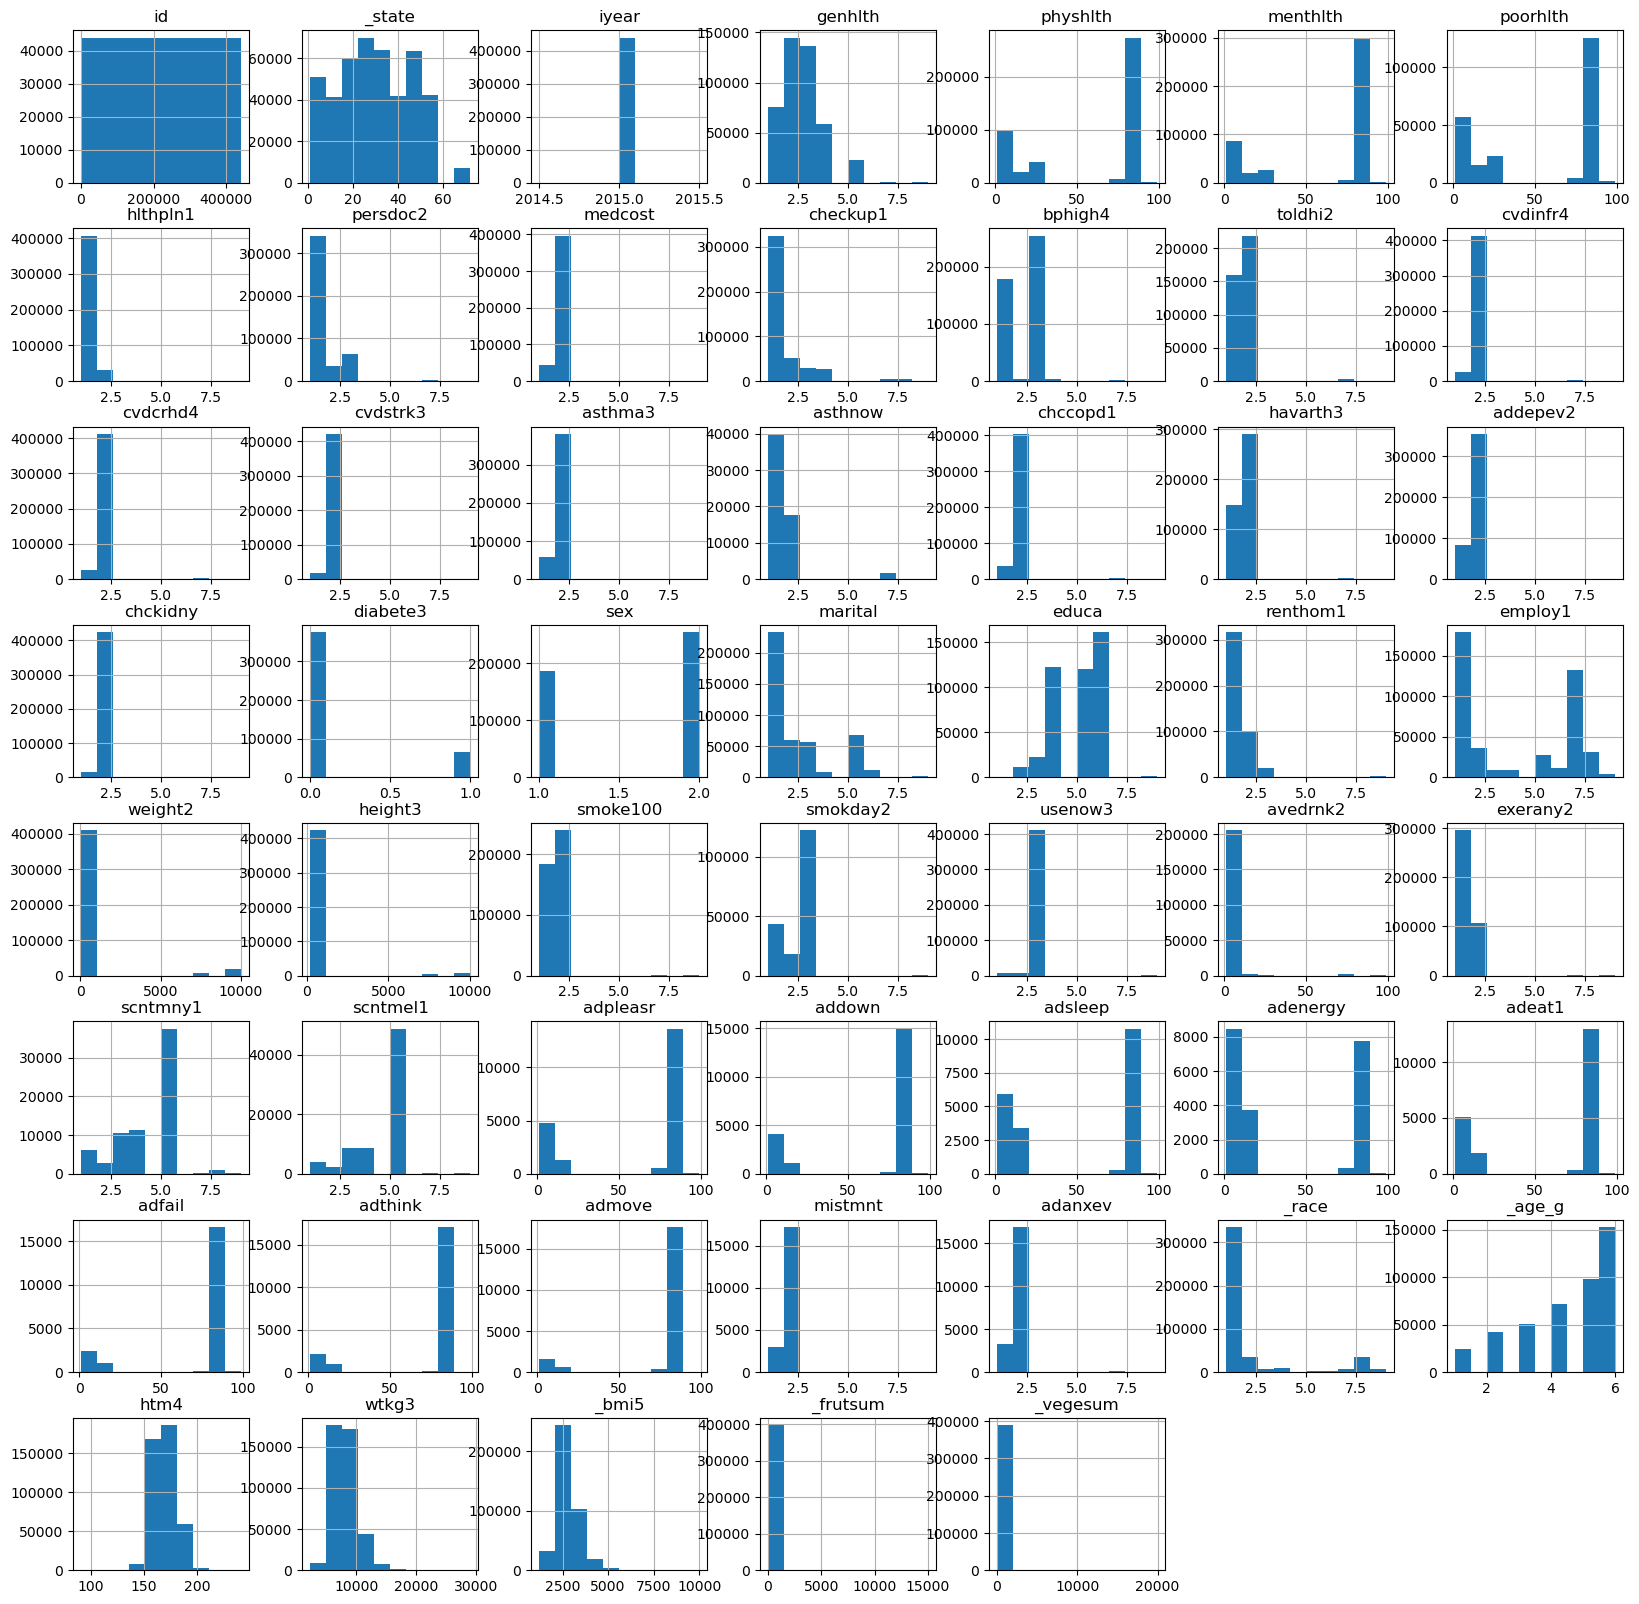

In [6]:
p = df.hist(figsize = (20,20))

In [7]:
# Remove NaN Values from all other fields (Features); replace with a value that is unused in the raw data set
df.fillna(100, inplace=True)

In [8]:
df.isnull().sum()

id          0
_state      0
iyear       0
genhlth     0
physhlth    0
menthlth    0
poorhlth    0
hlthpln1    0
persdoc2    0
medcost     0
checkup1    0
bphigh4     0
toldhi2     0
cvdinfr4    0
cvdcrhd4    0
cvdstrk3    0
asthma3     0
asthnow     0
chccopd1    0
havarth3    0
addepev2    0
chckidny    0
diabete3    0
sex         0
marital     0
educa       0
renthom1    0
employ1     0
weight2     0
height3     0
smoke100    0
smokday2    0
usenow3     0
avedrnk2    0
exerany2    0
scntmny1    0
scntmel1    0
adpleasr    0
addown      0
adsleep     0
adenergy    0
adeat1      0
adfail      0
adthink     0
admove      0
mistmnt     0
adanxev     0
_race       0
_age_g      0
htm4        0
wtkg3       0
_bmi5       0
_frutsum    0
_vegesum    0
dtype: int64

# Prepare data for Machine Learning

In [9]:
# split the data into X (features) and y (target):

y = df['diabete3']
X = df.drop(columns=['diabete3','id'])
X.describe()

,_state,iyear,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,checkup1,...,admove,mistmnt,adanxev,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
count,440658.000000,440658.0,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,...,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,4.406580e+05,4.406580e+05
mean,29.966981,2015.0,2.578056,60.666996,64.684465,77.272858,1.100620,1.394735,1.916203,1.573538,...,99.031898,95.478879,95.480391,2.019503,4.444261,167.050776,7534.909508,2581.944481,1.326826e+02,1.838081e+02
std,16.033034,0.0,1.135822,37.054663,35.843267,35.121397,0.508821,0.832276,0.438534,1.256077,...,6.994825,20.571697,20.569131,2.271043,1.552309,16.412800,2913.536224,978.517652,1.314426e+02,1.495067e+02
min,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,100.000000,100.000000,5.397605e-79,5.397605e-79
25%,19.000000,2015.0,2.000000,15.000000,28.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,3.000000,160.000000,6350.000000,2281.000000,6.000000e+01,1.000000e+02
50%,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,5.000000,168.000000,7711.000000,2645.000000,1.000000e+02,1.530000e+02
75%,44.000000,2015.0,3.000000,88.000000,88.000000,100.000000,1.000000,1.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,1.000000,6.000000,178.000000,9072.000000,3041.000000,2.000000e+02,2.320000e+02
max,72.000000,2015.0,100.000000,100.000000,99.000000,100.000000,9.000000,9.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


In [10]:
# check balance of target column
y.value_counts()

0    375712
1     64946
Name: diabete3, dtype: int64

In [11]:
# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({0: 251826, 1: 43414})

In [12]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [14]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8608631668706762


In [15]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[121385   2501]
 [ 17732   3800]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123886
           1       0.60      0.18      0.27     21532

    accuracy                           0.86    145418
   macro avg       0.74      0.58      0.60    145418
weighted avg       0.83      0.86      0.83    145418



In [16]:
# Calculate Feature importances
rfc.feature_importances_

array([0.05751491, 0.        , 0.05052009, 0.02830661, 0.02199394,
       0.02552922, 0.00424062, 0.01154988, 0.006493  , 0.01267934,
       0.04090404, 0.03039392, 0.00980698, 0.01014806, 0.00646941,
       0.00692167, 0.00849352, 0.00770652, 0.01447893, 0.00949239,
       0.00883274, 0.0082789 , 0.02322986, 0.02643972, 0.01266758,
       0.02912687, 0.05184219, 0.03676791, 0.01164614, 0.01585993,
       0.00540771, 0.02193254, 0.01452896, 0.01094418, 0.01032672,
       0.00225576, 0.00201617, 0.00260083, 0.00294601, 0.00242992,
       0.00169905, 0.00168063, 0.00166534, 0.00146117, 0.00145945,
       0.01849273, 0.02915468, 0.03635851, 0.05193652, 0.07519634,
       0.05302962, 0.0641423 ])

(<AxesSubplot:>,)

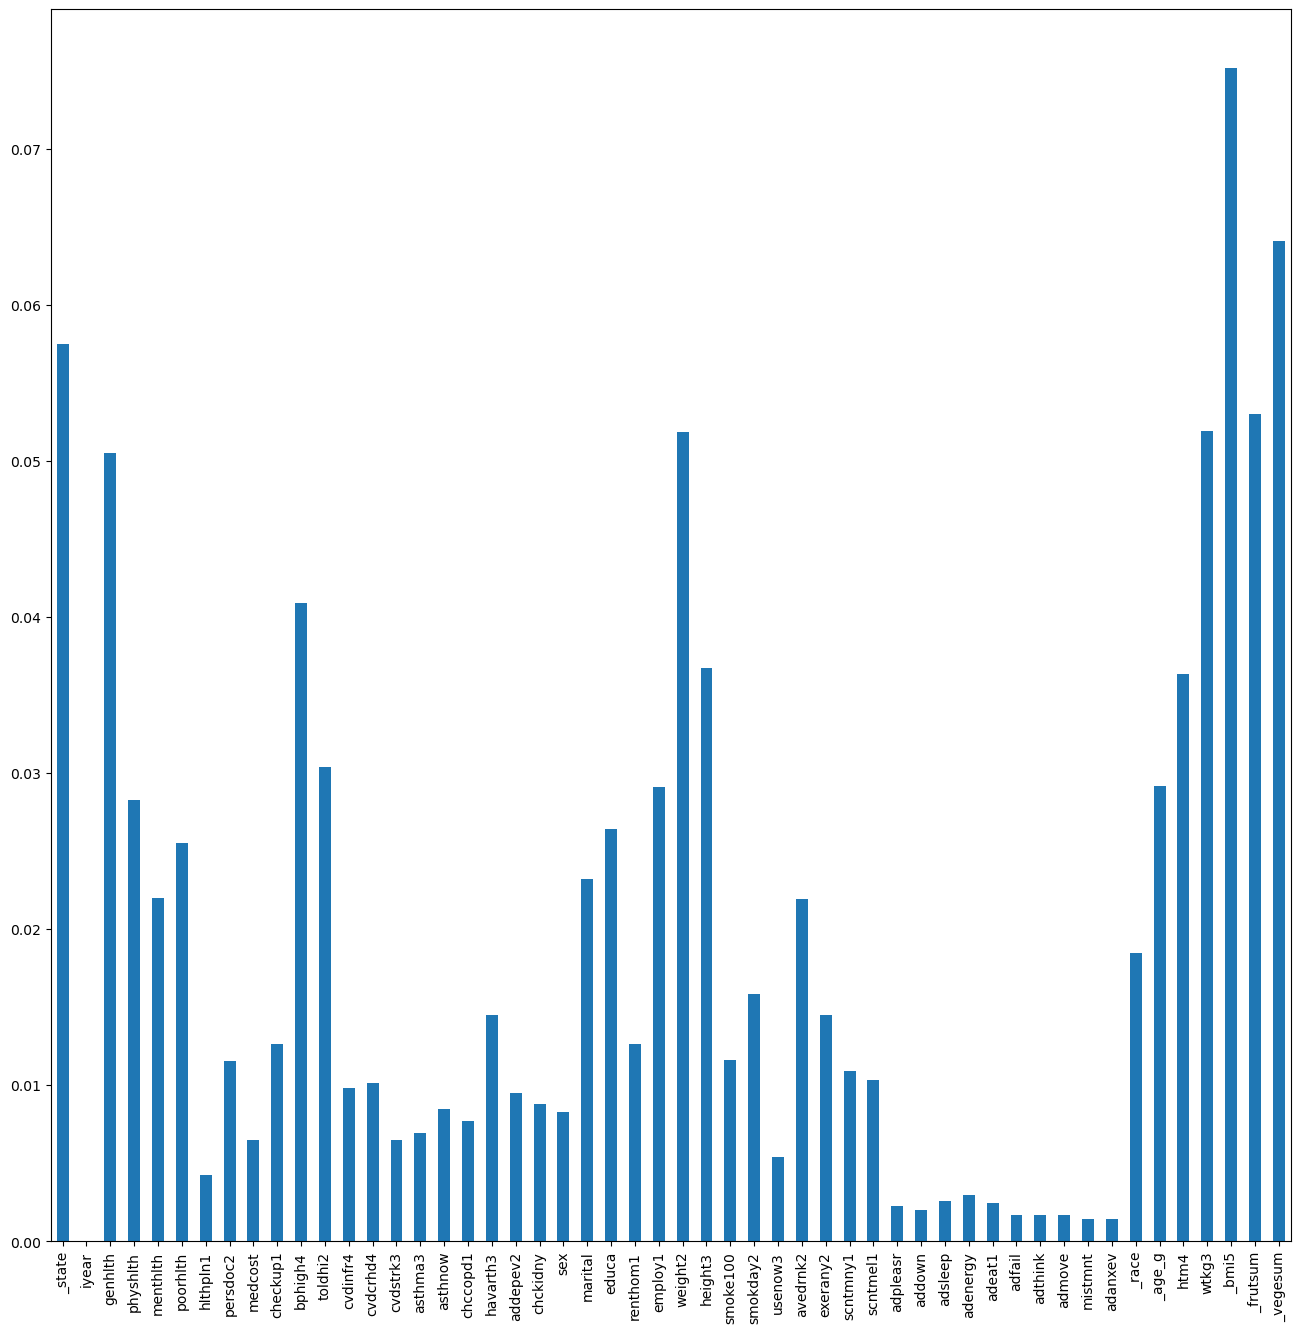

In [17]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [18]:
# Based on above importances, reduce the Features to the top 20 most imporantant

index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_bmi5,0.075196
_vegesum,0.064142
_state,0.057515
_frutsum,0.053030
wtkg3,0.051937


In [19]:
top_20 = importances[0:20]
top_20

,importance
_bmi5,0.075196
_vegesum,0.064142
_state,0.057515
_frutsum,0.053030
wtkg3,0.051937
weight2,0.051842
genhlth,0.050520
bphigh4,0.040904
height3,0.036768
htm4,0.036359


In [20]:
cut = importances[20:]
cut

,importance
smokday2,0.015860
exerany2,0.014529
havarth3,0.014479
checkup1,0.012679
renthom1,0.012668
smoke100,0.011646
persdoc2,0.011550
scntmny1,0.010944
scntmel1,0.010327
cvdcrhd4,0.010148


In [21]:
to_cut = cut.index.to_list()
to_cut

['smokday2',
 'exerany2',
 'havarth3',
 'checkup1',
 'renthom1',
 'smoke100',
 'persdoc2',
 'scntmny1',
 'scntmel1',
 'cvdcrhd4',
 'cvdinfr4',
 'addepev2',
 'chckidny',
 'asthnow',
 'sex',
 'chccopd1',
 'asthma3',
 'medcost',
 'cvdstrk3',
 'usenow3',
 'hlthpln1',
 'adenergy',
 'adsleep',
 'adeat1',
 'adpleasr',
 'addown',
 'adfail',
 'adthink',
 'admove',
 'mistmnt',
 'adanxev',
 'iyear']

In [22]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_state,genhlth,physhlth,menthlth,poorhlth,bphigh4,toldhi2,marital,educa,employ1,weight2,height3,avedrnk2,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
0,1,5.0,15.0,18,10.0,1.0,1.0,1.0,4.0,8.0,280.0,510.0,100.0,1.0,5,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,88.0,88,100.0,3.0,2.0,2.0,6.0,3.0,165.0,508.0,100.0,1.0,4,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,15.0,88,88.0,3.0,1.0,2.0,4.0,7.0,158.0,511.0,100.0,1.0,6,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,30.0,30,30.0,1.0,1.0,1.0,4.0,8.0,180.0,507.0,100.0,1.0,5,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,20.0,88,30.0,3.0,2.0,1.0,5.0,8.0,142.0,504.0,100.0,1.0,5,163.0,6441.0,2437.0,100.0,200.0


In [23]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({1: 43511, 0: 251729})

In [24]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [26]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8588139019928757


In [27]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[120896   3087]
 [ 17444   3991]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123983
           1       0.56      0.19      0.28     21435

    accuracy                           0.86    145418
   macro avg       0.72      0.58      0.60    145418
weighted avg       0.83      0.86      0.83    145418



In [28]:
# Simplified set of 20 features performs as well in the random forest classifier as the original 53 columns.

In [29]:
# For segment 3:
# Review other machine learning models; can we further downselect features?
# Right now, even if we re-run and re-run the jupyter notebook, the top 20 features remain constant even if we look at 2011 data instead of 2015
# At what number of features does that not remain true?

In [30]:
# Calculate Feature importances
rfc.feature_importances_

array([0.08642889, 0.05612747, 0.03757723, 0.03057324, 0.03436295,
       0.04856905, 0.03377157, 0.03222996, 0.03600229, 0.03911836,
       0.06301604, 0.04510204, 0.02651477, 0.02263206, 0.03442198,
       0.04449406, 0.06322094, 0.09563927, 0.07612459, 0.09407323])

(<AxesSubplot:>,)

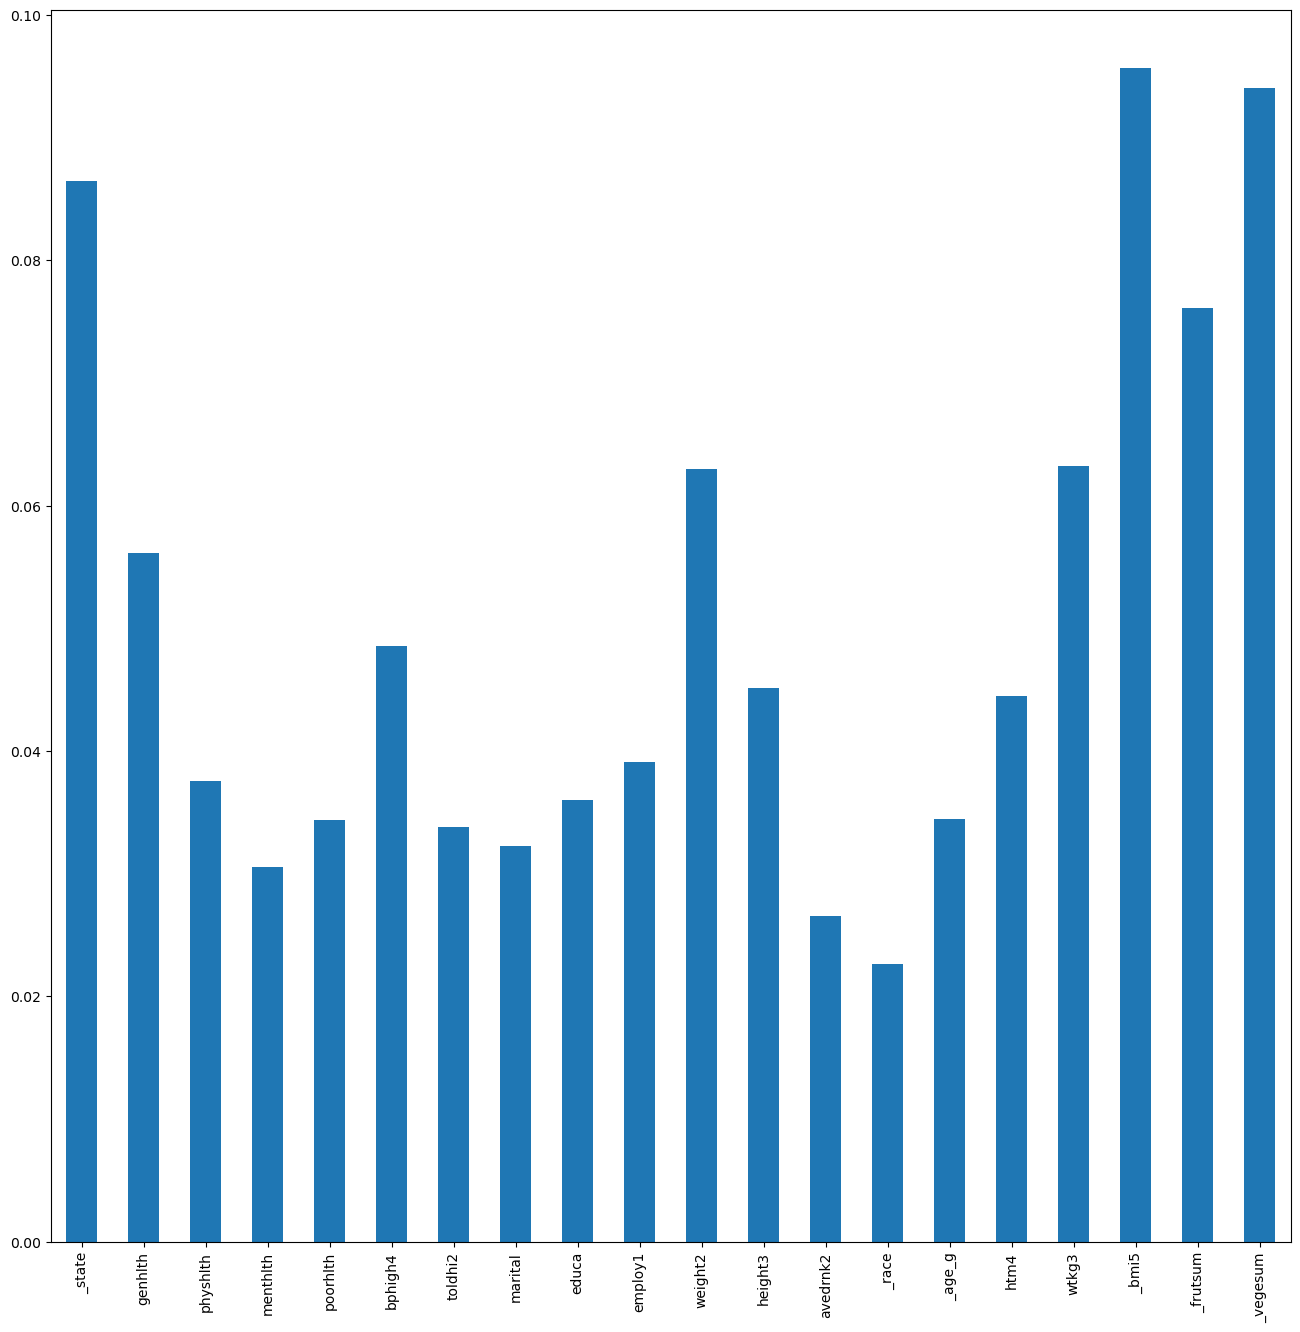

In [31]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [32]:
index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_bmi5,0.095639
_vegesum,0.094073
_state,0.086429
_frutsum,0.076125
wtkg3,0.063221


In [33]:
top_10 = importances[0:10]
top_10

,importance
_bmi5,0.095639
_vegesum,0.094073
_state,0.086429
_frutsum,0.076125
wtkg3,0.063221
weight2,0.063016
genhlth,0.056127
bphigh4,0.048569
height3,0.045102
htm4,0.044494


In [34]:
cut = importances[10:]
cut

,importance
employ1,0.039118
physhlth,0.037577
educa,0.036002
_age_g,0.034422
poorhlth,0.034363
toldhi2,0.033772
marital,0.032230
menthlth,0.030573
avedrnk2,0.026515
_race,0.022632


In [35]:
to_cut = cut.index.to_list()
to_cut

['employ1',
 'physhlth',
 'educa',
 '_age_g',
 'poorhlth',
 'toldhi2',
 'marital',
 'menthlth',
 'avedrnk2',
 '_race']

In [36]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_state,genhlth,bphigh4,weight2,height3,htm4,wtkg3,_bmi5,_frutsum,_vegesum
0,1,5.0,1.0,280.0,510.0,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,3.0,165.0,508.0,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,3.0,158.0,511.0,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,1.0,180.0,507.0,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,3.0,142.0,504.0,163.0,6441.0,2437.0,100.0,200.0


In [37]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({0: 251860, 1: 43380})

In [38]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [40]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8448197609649425


In [41]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[119286   4566]
 [ 18000   3566]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    123852
           1       0.44      0.17      0.24     21566

    accuracy                           0.84    145418
   macro avg       0.65      0.56      0.58    145418
weighted avg       0.81      0.84      0.81    145418

